In [1]:
import pandas as pd

df = pd.read_csv("employees_dataset.csv")

In [2]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [3]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [4]:
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [5]:
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(), inplace=True)

In [6]:
df.isnull().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [7]:
print(df.shape)

(17417, 13)


In [8]:
print(df.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              17417 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   17417 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


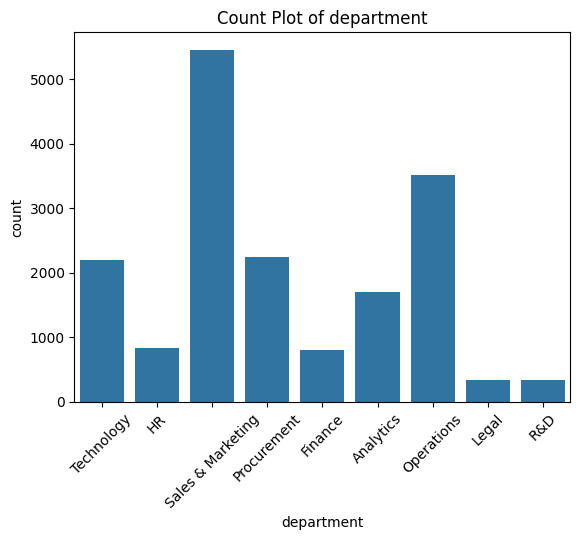

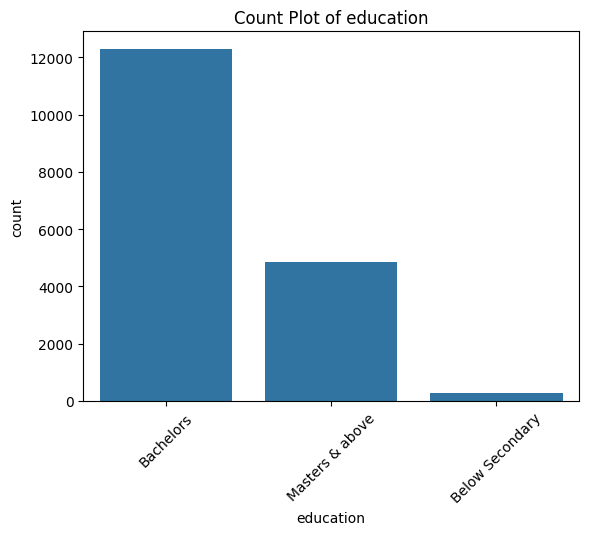

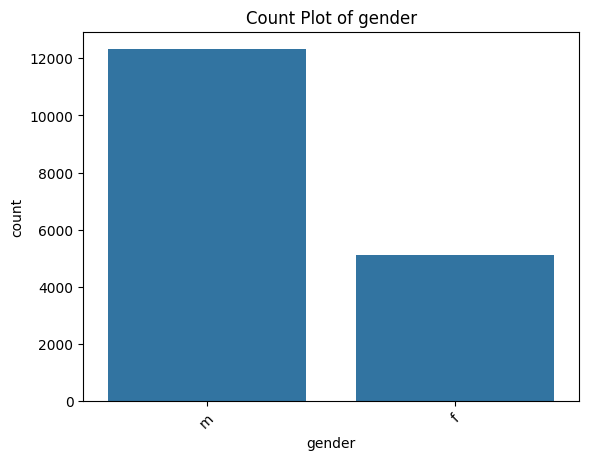

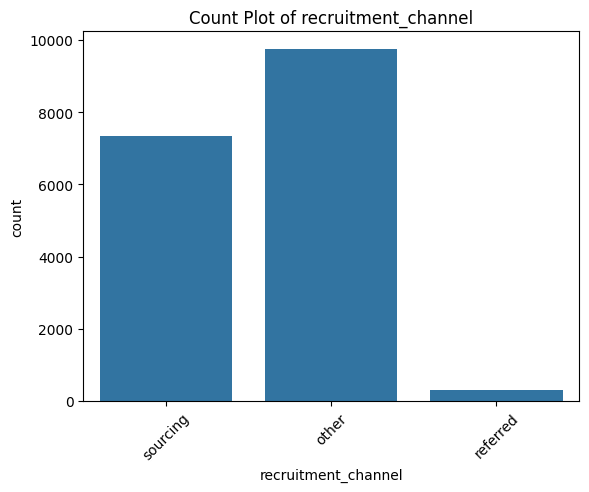

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['department', 'education', 'gender', 'recruitment_channel']
for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
    plt.show()


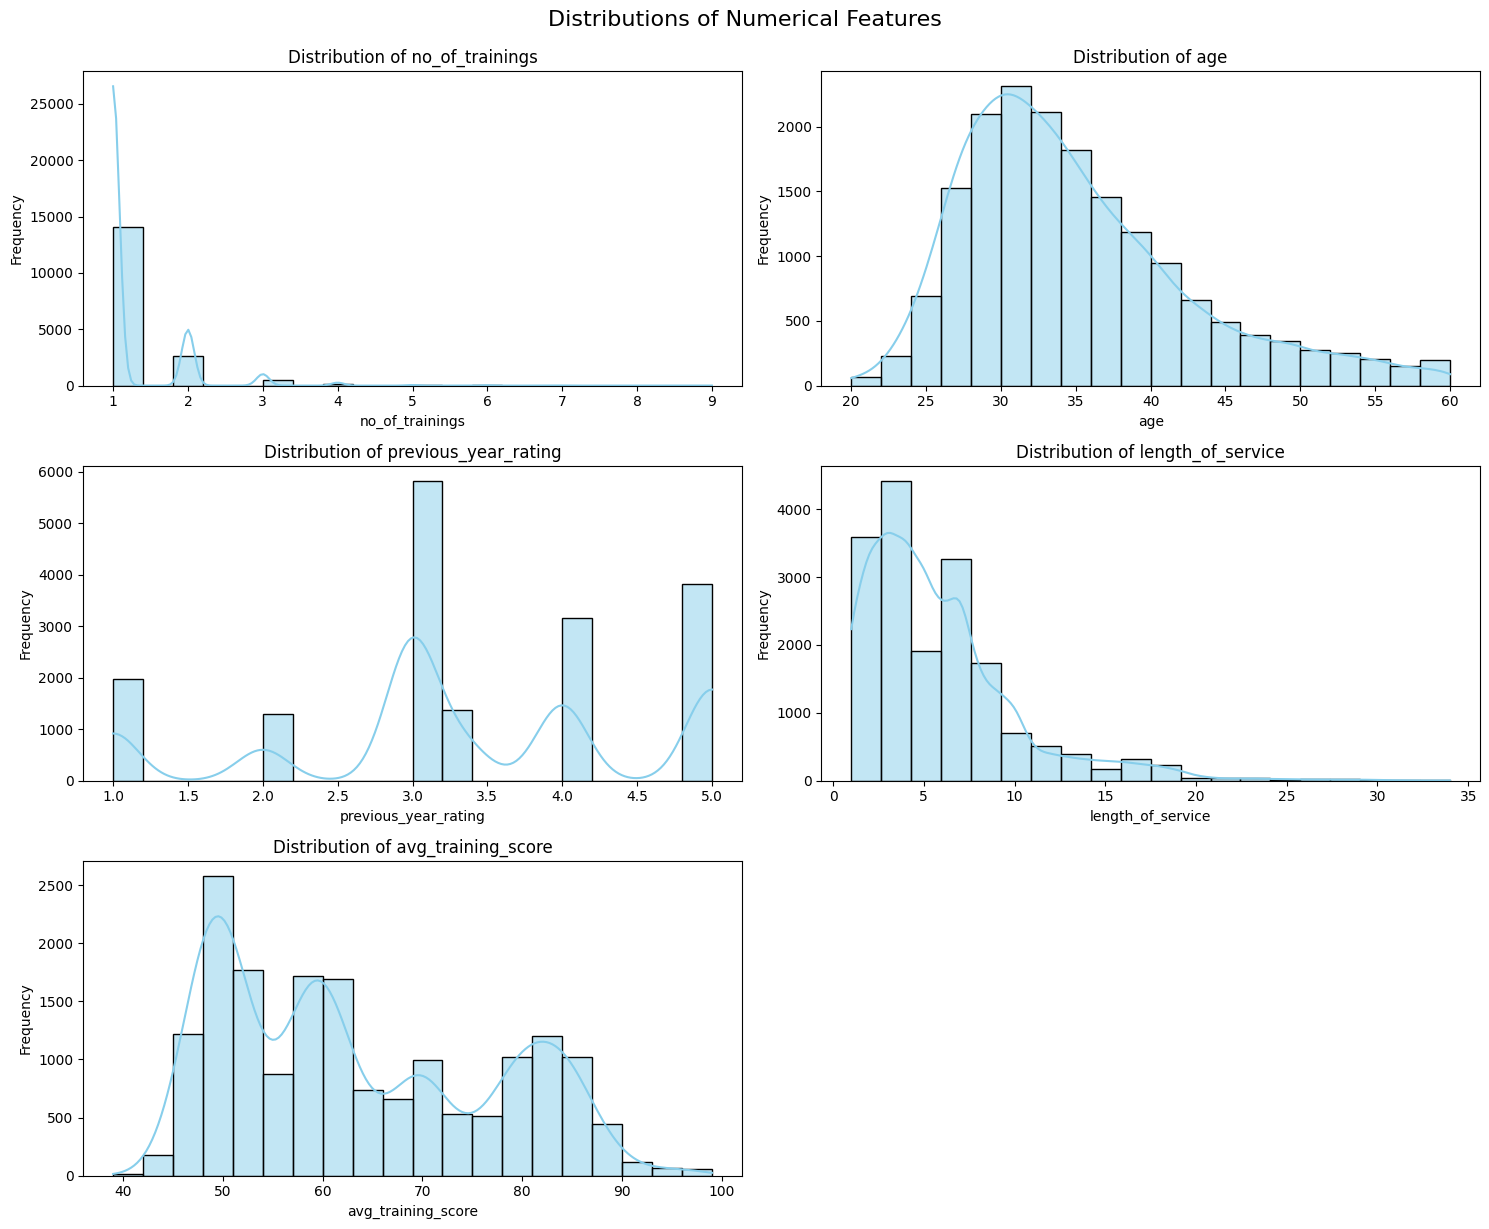

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['no_of_trainings', 'age', 'previous_year_rating', 
            'length_of_service', 'avg_training_score']

# Set up the plot grid
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns layout
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Distributions of Numerical Features', fontsize=16, y=1.02)
plt.show()


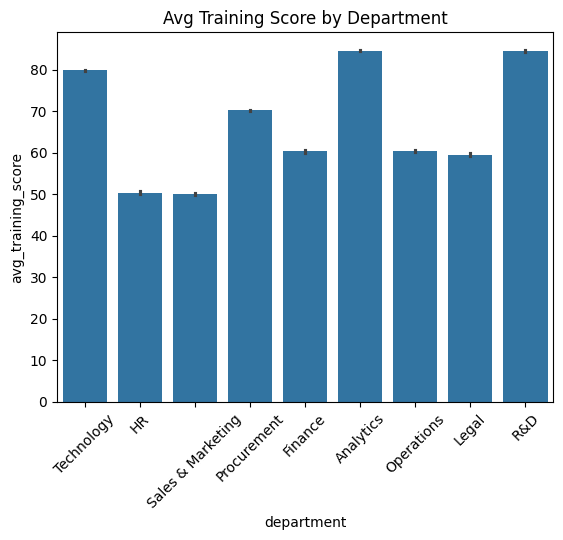

In [12]:
# Example: Average training score per department
sns.barplot(data=df, x='department', y='avg_training_score')
plt.xticks(rotation=45)
plt.title('Avg Training Score by Department')
plt.show()


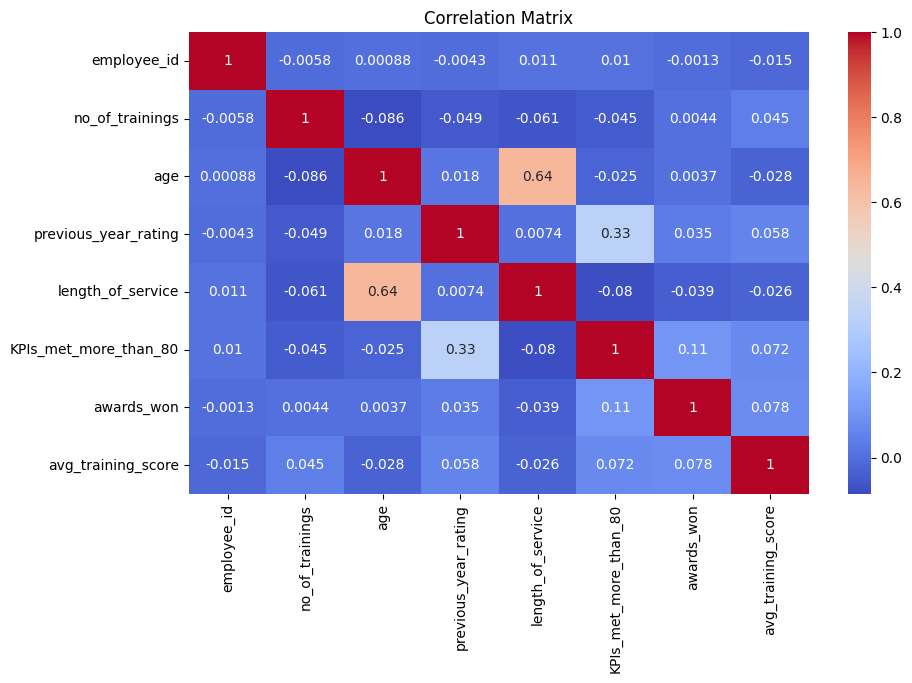

In [13]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [15]:
X = df.drop(['employee_id', 'KPIs_met_more_than_80'], axis=1)
y = df['KPIs_met_more_than_80']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.model_selection import GridSearchCV



params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [19]:
from sklearn.ensemble import RandomForestClassifier

best_model = grid.best_estimator_
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [20]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))


Tuned Model Accuracy: 0.6937428243398392


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.6854190585533869
Precision: 0.6063249727371864
Recall: 0.43067389620449265
F1 Score: 0.5036231884057971

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77      2193
           1       0.61      0.43      0.50      1291

    accuracy                           0.69      3484
   macro avg       0.66      0.63      0.64      3484
weighted avg       0.67      0.69      0.67      3484



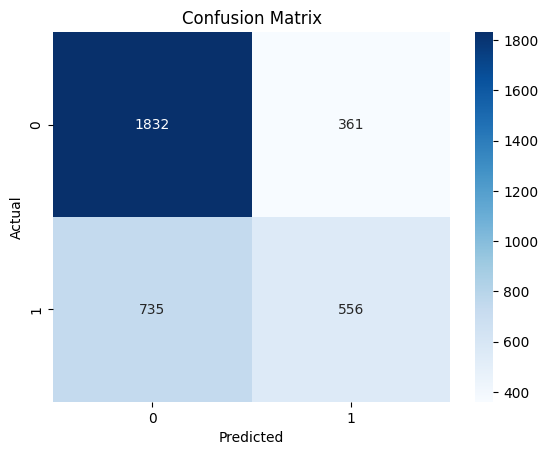

In [23]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
